# ✈️ GetSetGoAI: Agentic Workflow Exploration

**CRITICAL:** If you see `FileNotFoundError`, please **Restart the Kernel** and clear all outputs before running.
This ensures the latest code changes in `utils/config_loader.py` are loaded correctly.

In [7]:
import sys
import os
import warnings
import importlib

# 1. Setup paths
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# 2. Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 3. Load environment
from dotenv import load_dotenv
load_dotenv(dotenv_path=os.path.join(project_root, ".env"))

# 4. Aggressive reload of the hierarchy
import utils.config_loader
import utils.model_loaders
import Agent.agentic_workflow

importlib.reload(utils.config_loader)
importlib.reload(utils.model_loaders)
importlib.reload(Agent.agentic_workflow)

print("✅ Environment setup complete. Modules reloaded.")
print(f"Config loader path: {utils.config_loader.__file__}")

✅ Environment setup complete. Modules reloaded.
Config loader path: e:\GetSetGoAI\utils\config_loader.py


## 1. Initialize the GraphBuilder

The `GraphBuilder` is the central orchestrator. It loads the LLM provider, prepares the tools, and compiles the LangGraph state machine.

In [8]:
from Agent.agentic_workflow import GraphBuilder

# Initialize with the preferred provider from .env or default to google
provider = os.getenv("MODEL_PROVIDER", "google")
builder = GraphBuilder(model_provider=provider)
react_app = builder()

print(f"✅ Workflow compiled with provider: {provider}")

DEBUG: config_loader.py loaded from: e:\GetSetGoAI\utils\config_loader.py
DEBUG: Attempting to open config at: e:\GetSetGoAI\config\config.yaml
--- Loading LLM Provider: groq ---
✅ Workflow compiled with provider: groq


## 2. Inspect Available Tools

Let's see what capabilities the agent has at its disposal.

In [9]:
print("🔧 Available Tools:")
for tool in builder.tools:
    print(f"- {tool.name}: {tool.description[:80]}...")

🔧 Available Tools:
- get_current_weather: Get current weather conditions for a city....
- get_weather_forecast: Get a summarized 5-day weather forecast for a city....
- search_attractions: Search for top attractions in and around a given place...
- search_restaurants: Search for top restaurants in and around a given place...
- search_hotels: Search for top hotels in and around a given place...
- search_activities: Search for top activities in and around a given place...
- search_transportation: Search for transportation options in and around a given place...
- multiply: Multiply two numbers together.

Args:
    a: The first number
    b: The second ...
- add: Add two numbers together.

Args:
    a: The first number
    b: The second numbe...
- subtract: Subtract two numbers.

Args:
    a: The first number
    b: The second number

R...
- divide: Divide two numbers.

Args:
    a: The first number (dividend)
    b: The second ...
- convert_currency: convert amount from one currency to an

## 3. Execute a Practical Query

We will simulate a request from the Streamlit UI, including the `Trip Context` metadata.

In [10]:
query = "Plan a 3-day budget trip to Jaipur focusing on historical sites."
target_currency = "INR"

metadata = (
    f"Trip Context: Travelers: 1, "
    f"Month: October, "
    f"Preferred Currency: {target_currency}. "
    f"IMPORTANT: Please proactively convert all costs and budgets to the Preferred Currency using your tools."
)

messages = {"messages": [("user", metadata), ("user", query)]}
config = {"configurable": {"thread_id": "notebook_test_123"}}

print("🚀 Invoking Assistant... (This may take 30-60 seconds)")
output = react_app.invoke(messages, config=config)

print("\n--- FINAL RESPONSE ---\n")
if isinstance(output, dict) and "messages" in output:
    print(output["messages"][-1].content)
else:
    print(output)

🚀 Invoking Assistant... (This may take 30-60 seconds)

--- FINAL RESPONSE ---

## The Classic Route
### Itinerary
- Day 1: Arrival and Check-in at [Hotel Pearl Palace](https://www.hotelpearlpalace.com/), followed by a visit to the Amber Fort and Jal Mahal.
- Day 2: Explore the City Palace, Jantar Mantar, and Hawa Mahal.
- Day 3: Visit the Nahargarh Fort and Jaigarh Fort.

### Accommodation
Hotel Pearl Palace costs approximately ₹2,500 per night.

### Dining
- [Chokhi Dhani](https://www.chokhidhani.com/) for traditional Rajasthani cuisine, with meals ranging from ₹500 to ₹1,000.
- [Lakshmi Mishtan Bhandar](https://www.lakshmi-mishtan-bhandar.com/) for local sweets and snacks, with prices starting from ₹200.

### Logistics
- Local transportation: Auto-rickshaws and taxis are readily available, with fares starting from ₹100.
- Metro: Not available in Jaipur.

### Budgeting
- Total trip cost for 3 days: ₹25,000 (including accommodation, food, and transportation).
- Per day expense budget: 

## 4. Visualizing the Graph

You can also visualize the LangGraph architecture directly in the notebook (if Mermaid is supported or by saving the image).

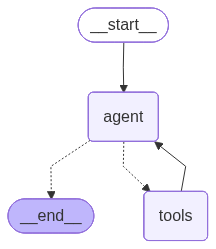

In [11]:
try:
    from IPython.display import Image, display
    display(Image(react_app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Could not display graph: {e}")